In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
def print_table(u, index, columns):
    pd.set_option("precision", 12)
    df = pd.DataFrame(data=u, index=index, columns=columns)
    return df

In [5]:
def uxa(y):
    return 75

def uxb(y):
    return 50

def uyc(x):
    return 0

def uyd(x):
    return 100

def boundary_conditions(uxa, uxb, xInterval, uyc, uyd, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    utop = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))
        utop = np.append(utop, uyd(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, utop, uleft, uright

def elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval):
    ubottom, utop, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, uyd, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.full((m, n), (0 + 75 + 100 + 50)/4)
    u[0, :] = ubottom
    u[-1, :] = utop
    u[:, 0] = uleft
    u[:, -1] = uright

    print("Tabla inicial 0")
    print(print_table(u, range(len(u[:,0])), ['U0j', 'U1j','U2j','U3j', 'U4j']))

    for j in range(1, 4):
        for i in range(1, 4):
            u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    print("\nIteracion 1") 
    print(print_table(u, range(len(u[:,0])), ['U0j', 'U1j','U2j','U3j', 'U4j']))

    for j in range(1, 4):
        for i in range(1, 4):
            u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    print("\nIteracion 2")        
    print(print_table(u, range(len(u[:,0])), ['U0j', 'U1j','U2j','U3j', 'U4j']))

    for k in range(3, 51):
        for j in range(1, 4):
            for i in range(1, 4):
                u[j,i] = (u[j,i-1] + u[j,i+1] + u[j-1,i] + u[j+1,i])/4
    return u

### Print

In [8]:
xa, xb = 0, 4
Δx = 1

ya, yb = 0, 4
Δy = 1

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = elliptical(uxa, uxb, xInterval, uyc, uyd, yInterval)
print("...")
print("Iteracion 50")
print(print_table(u, range(len(u[:,0])), ['U0j', 'U1j','U2j','U3j', 'U4j']))

Tabla inicial 0
    U0j     U1j     U2j     U3j   U4j
0  75.0    0.00    0.00    0.00  50.0
1  75.0   56.25   56.25   56.25  50.0
2  75.0   56.25   56.25   56.25  50.0
3  75.0   56.25   56.25   56.25  50.0
4  75.0  100.00  100.00  100.00  50.0

Iteracion 1
    U0j          U1j            U2j             U3j   U4j
0  75.0    0.0000000    0.000000000    0.0000000000  50.0
1  75.0   46.8750000   39.843750000   36.5234375000  50.0
2  75.0   58.5937500   52.734375000   48.8769531250  50.0
3  75.0   72.4609375   70.361328125   67.3095703125  50.0
4  75.0  100.0000000  100.000000000  100.0000000000  50.0

Iteracion 2
    U0j            U1j               U2j               U3j   U4j
0  75.0    0.000000000    0.000000000000    0.000000000000  50.0
1  75.0   43.359375000   33.154296875000   33.007812500000  50.0
2  75.0   60.888671875   53.320312500000   50.909423828125  50.0
3  75.0   76.562500000   74.298095703125   68.801879882812  50.0
4  75.0  100.000000000  100.000000000000  100.00000000000

### Plot

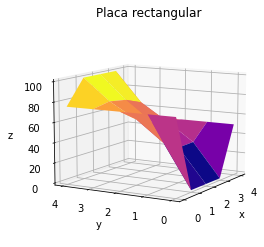

In [4]:
X1, X2 = np.meshgrid(xInterval, yInterval, sparse=True)
Z = np.copy(u)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, edgecolor='none', cmap='plasma')
ax.view_init(10, 210)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Placa rectangular')
plt.show()